In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# To show all the columns
pd.pandas.set_option('display.max_column',None)

In [2]:
df = pd.read_csv('car data.csv')


In [3]:
df['Year']=2020-df['Year']


In [4]:
final_dataset = pd.get_dummies(df.drop(['Car_Name'],axis=1),drop_first=True)

In [5]:
final_dataset=final_dataset[['Year',  'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual','Selling_Price']]

In [6]:
#independent and dependant features
x=final_dataset.iloc[:,:-1]
y=final_dataset.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[int(X) for X in np.linspace(start = 100, stop = 1100 , num =11)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(6,20,num =4)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split =[2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [27]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
# Initalizing random forest regressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [29]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=800, min_samples_split=10

[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [30]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 6}

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor (n_estimators= 100,
 min_samples_split= 5,min_samples_leaf= 5,max_features= 'auto',max_depth= 6)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

MSE: 0.3955774555284577


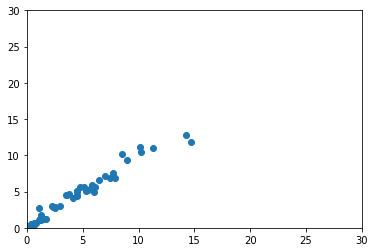

In [32]:
prediction=model.predict(X_test)

plt.scatter(y_test,prediction)
axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0,30])

from sklearn import metrics
print('MSE:', metrics.mean_absolute_error(y_test, prediction))

In [33]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

# close the file
file.close()

In [34]:

# loading Pickled file

# open a file, where you stored the pickled data
file = open('random_forest_regression_model.pkl', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()